In [1]:
import sombrero as sb
import matplotlib.pyplot as plt
import numpy as np

# CW 12: Duffing Oscillators
Trevor Kling

11/18/2018
## Introduction
For a ball moving with slight friction, the potential as a function of distance $x$ can be described by the function $V(x) = x^4/4 - x^2/2$.  This function is sometimes referred to as a "sombrero," due to its high central peak and distal troughs. In this module, a rolling ball described by this function is given a slight driving force $F$.  This causes the system to be able to be re-written as
$$m\ddot{x} = f_{\text{hat}}(x) + f_{\text{drag}}(\dot{x}) + f_{\text{drive}}(t) = x - x^3 - \nu \dot{x} + F\cos(\omega t)$$
which can subseqently be broken into a system of differential equations,
$$\dot{x}(t) = y(t)$$
$$m\dot{y}(t) = -\nu y(t) + x(t) - x^3(t) + F\cos(\omega t)$$
This system is then solved using the Fourth-Order Runge-Kutta method, and graphed as a parametric curve $(x(t), y(t))$.  The effect of various forces and starting positions on the Duffing Oscillator is then examined.

In [2]:
# A simple graphing utility for plotting the functions
def lineplotter(vals, F, name):
    plt.plot(vals[0], vals[1], label="Duffing oscillator, F = {}".format(F))
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()
def scatterplotter(vals, F, name):
    plt.scatter(vals[0], vals[1], label="Duffing oscillator, F = {}".format(F), s=2)
    plt.title(name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

## Implementation
The "sombrero" module takes an input for values of `F`, `x0`, `y0`, and `N` to produce an array `vals` which contains two arrays of $2\pi N$ entries, one for $x$ values and one for $y$ values.

## Analysis

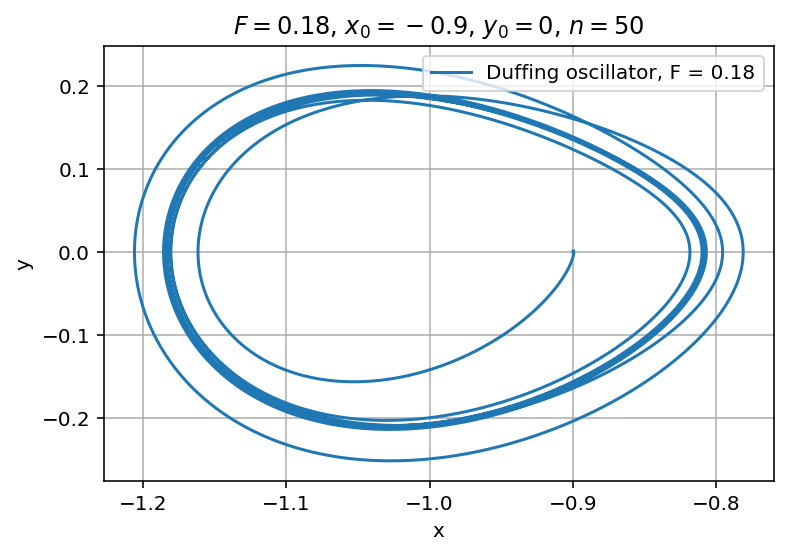

In [3]:
vals = sb.sombrero(0.18, -0.9, 0, 50)
lineplotter(vals, 0.18, "$F=0.18$, $x_0 = -0.9$, $y_0= 0$, $n=50$")

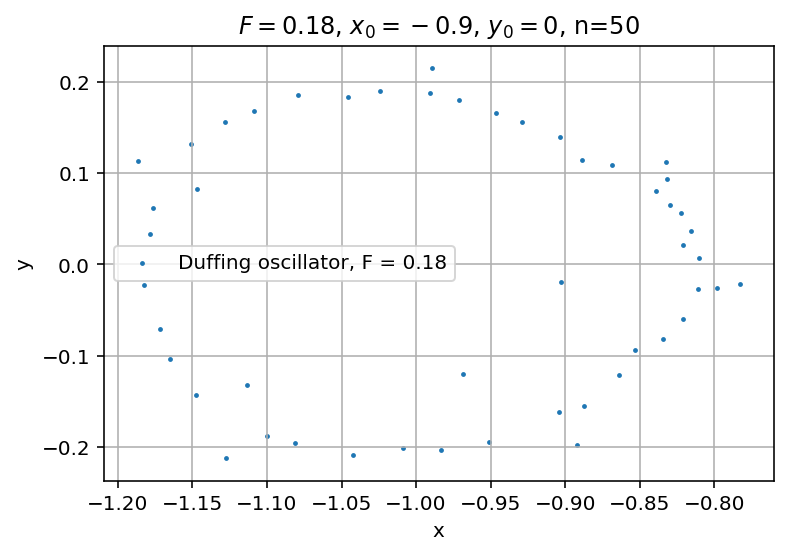

In [4]:
points = np.array([vals[:,1000*(n+1)] for n in range(50)])
scatterplotter(np.array([points[:,0], points[:,1]]), 0.18, "$F=0.18$, $x_0 = -0.9$, $y_0= 0$, n={}".format(50))

### Graph 1: $F=0.18$, $x_0 = -0.9$, $y_0 = 0$
The first of the graphs features a driving force of $0.18$, and produces a smooth, egg-like shape.  It can clearly be seen that the function is periodic, with a slight deviation due to the driving force.  To better analyze this graph, a Poincare section of the curve is also generated for all $t$ values where $t = 2\pi n \text{, } 0 \leq n \leq 50$. From this graph, it can be seen that a great deal of the points are concetrated in an elipse-like shape around the center point $(-1.00, 0)$ with far fewer points inside our outside the elipse.  This likely represents the ball falling into one of the "troughs" of potential, and only being shaken back and forth a bit when the driving force increases.

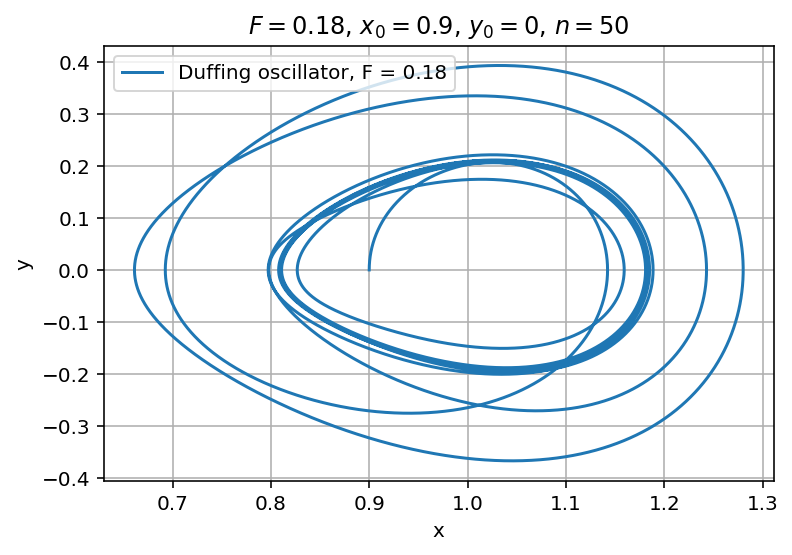

In [5]:
vals2 = sb.sombrero(0.18, 0.9, 0, 50)
lineplotter(vals2, 0.18, "$F=0.18$, $x_0 = 0.9$, $y_0= 0$, $n=50$")

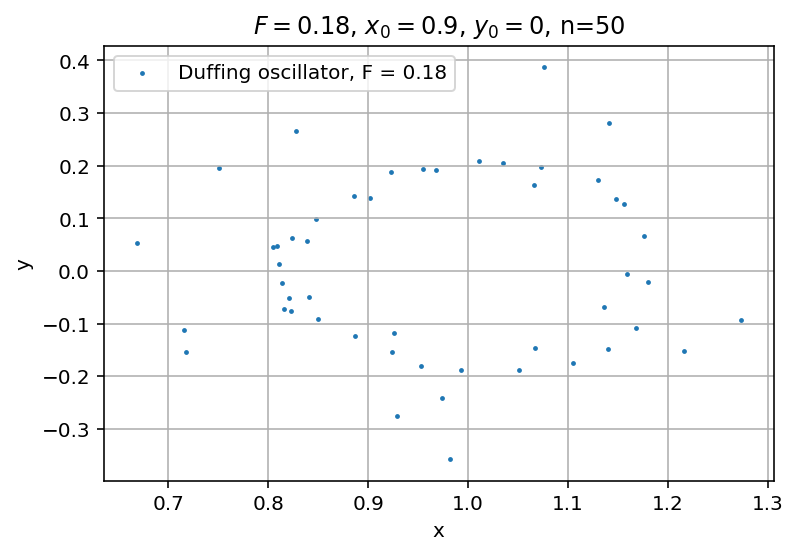

In [6]:
points2 = np.array([vals2[:,1000*(n+1)] for n in range(50)])
scatterplotter(np.array([points2[:,0], points2[:,1]]), 0.18, "$F=0.18$, $x_0 = 0.9$, $y_0= 0$, n={}".format(50))

### Graph 2: $F=0.18$, $x_0 = 0.9$, $y_0 = 0$
For the next graph, the same system is analyzed with a positive $x_0$ value.  Interestingly, the loop moves the opposite direction and is substantially more prone to diverging from the most solid loop.  The change of direction is likely caused by the ball being moved to the opposite side of the sombrero, causing it to roll down into the other trough.  The Poincare section shows a similar result to before, but with a less convergent result.  Points seem to scatter farther due to the driving force when the $x_0$ is positive than when it is negative.  This is likely due to the fact that the driving force is always positive, and the slope of the outer edge of the trough is not a steep as the slope of the peak of the sombrero.  Therefore, attempting to push the ball up the more gradual slope with the same force will result in a larger distance traveled.

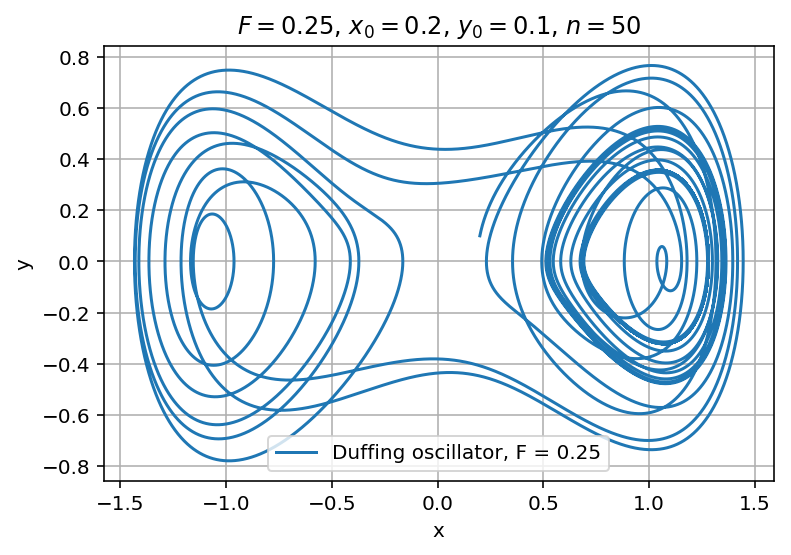

In [13]:
vals3 = sb.sombrero(0.25, 0.2, 0.1, 50)
lineplotter(vals3, 0.25, "$F=0.25$, $x_0 = 0.2$, $y_0= 0.1$, $n=50$")

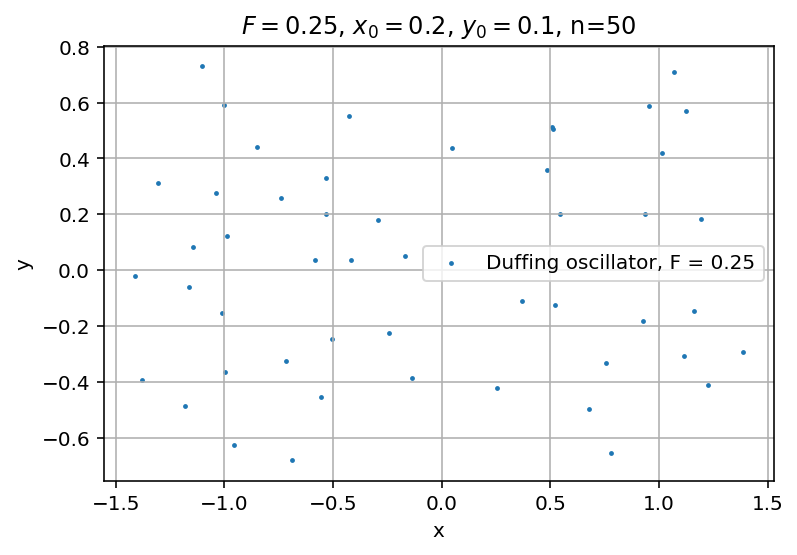

In [8]:
points3 = np.array([vals3[:,1000*(n+1)] for n in range(50)])
scatterplotter(np.array([points3[:,0], points3[:,1]]), 0.25, "$F=0.25$, $x_0 = 0.2$, $y_0= 0.1$, n={}".format(50))

### Graph 3: $F=0.25$, $x_0 = 0.2$, $y_0= 0.1$
In the third graph, a much more interesting graph is produced.  In this case, it is clear that the ball is reaching both troughs on either side of the sombrero at some point in the ball's motion.  This is due to the larger driving force, giving the ball enough energy to push over the peak of the sombrero.  The Poincare section, however, now gives very little information about how the object is behaving.  Without the graph before it, the scatterplot appears to simply be random.  The ball appears to spend more tiem in the right trough of the graph, as the lines are much denser in that portion of the line plot.

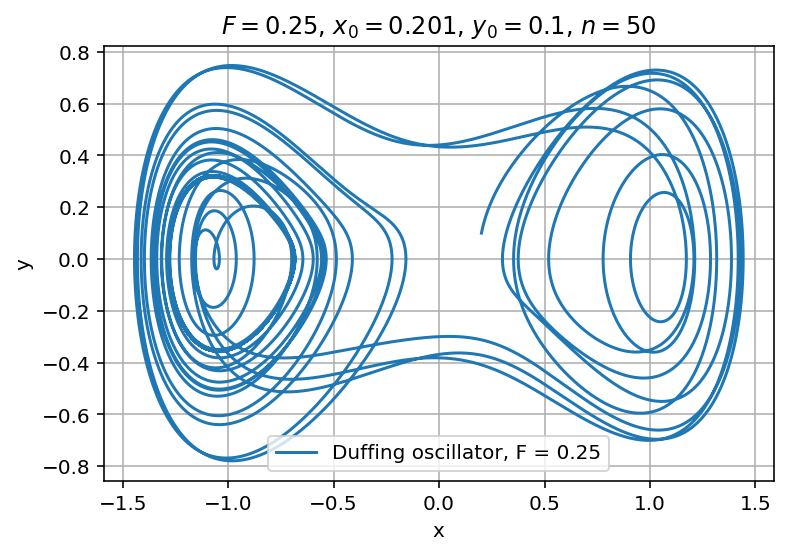

In [14]:
vals4 = sb.sombrero(0.25, 0.201, 0.1, 50)
lineplotter(vals4, 0.25, "$F=0.25$, $x_0 = 0.201$, $y_0= 0.1$, $n=50$")

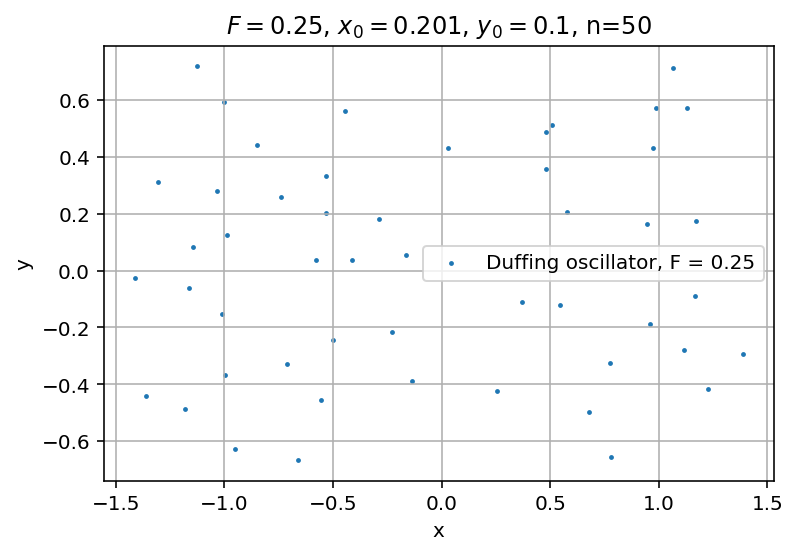

In [10]:
points4 = np.array([vals4[:,1000*(n+1)] for n in range(50)])
scatterplotter(np.array([points4[:,0], points4[:,1]]), 0.25, "$F=0.25$, $x_0 = 0.201$, $y_0= 0.1$, n={}".format(50))

### Graph 4: $F=0.25$, $x_0 = 0.201$, $y_0= 0.1$
However, with only a tiny change in the $x_0$ value, it can be seen that the graph is reflected over the y-axis; now the ball seems to spend more time on the left side.  Interestingly, the scatterplot is almost identical, not reflecting the change in $x_0$ value hardly at all.  This provides seemingly conflicting results; the first graph would indicate that the function is very sensative to perturbations in starting values, while the second graph indicates that small changes in starting value causes very little change.

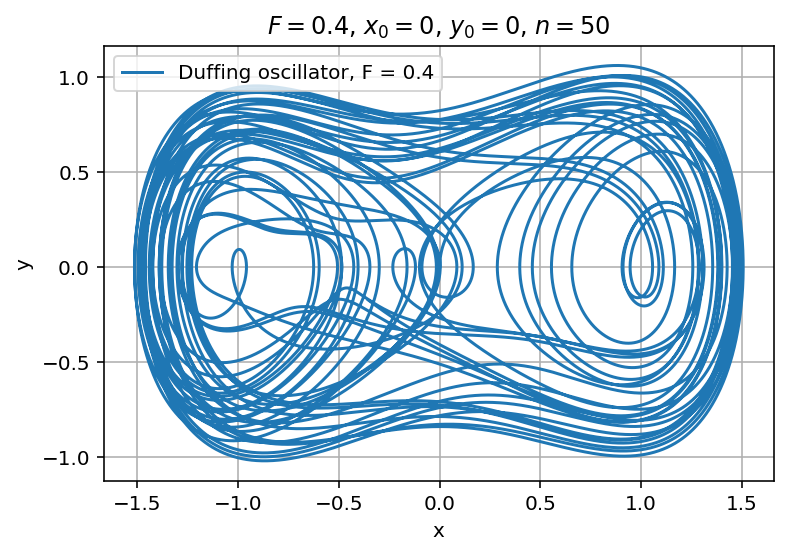

In [11]:
vals5 = sb.sombrero(0.4, 0, 0, 50)
lineplotter(vals5, 0.4, "$F=0.4$, $x_0 = 0$, $y_0= 0$, $n=50$")

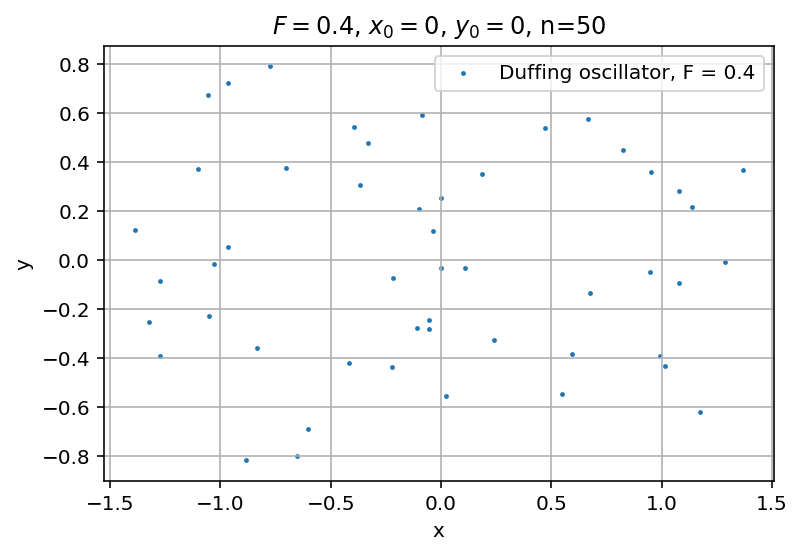

In [12]:
points5 = np.array([vals5[:,1000*(n+1)] for n in range(50)])
scatterplotter(np.array([points5[:,0], points5[:,1]]), 0.4, "$F=0.4$, $x_0 = 0$, $y_0= 0$, n={}".format(50))

### Graph 5: $F=0.4$, $x_0 = 0$, $y_0= 0$
In the final graph, the function was given a very large driving force and started at the peak of the sombrero.  In this case, the ball appears not to settle in a trough at all, but rather tends to continually move from one side of the sombrero to the other.  Additionally, there is a much larger degree of motion in ths graph than the others, as the lines at all points are very dense in the graph.  The Poincare section still appears random, but in a slightly different pattern that the previous runs.